In [1]:
%matplotlib widget
import sys
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.auto import tqdm, trange

src = str(Path('../src').resolve())
if src not in sys.path:
    sys.path.append(src)
    
from config import read_config, get_grid_update_tuples


cfg_path = Path("/work/pi_kandread_umass_edu/tss-ml/runs/hybrid_hyperparam_grid/base_config.yml")
cfg, _ = read_config(cfg_path)

params, update_list = get_grid_update_tuples(cfg)
params_short = [p[1] if isinstance(p, tuple) else p for p in params]

In [2]:
bulk = {}
basin = {}
for index in trange(60):
    index_dir = cfg_path.parent / f'index_{index}'
    
    bulk_metrics = []
    basin_metrics = []
    for fold in range(4):
        fold_dir = index_dir / f'fold_{fold}'
        
        has_epoch30 = (fold_dir / 'epoch030').is_dir()
        if not has_epoch30:
            continue
        
        results_file = fold_dir / 'test_data.pkl'
        if not results_file.is_file():
            continue
        with open(results_file, 'rb') as f:
            _, bulk_m, basin_m = pickle.load(f)
            bulk_metrics.append(pd.DataFrame(bulk_m))
            basin_metrics.append(pd.DataFrame(basin_m))
            
    if bulk_metrics:
        bulk[index] = pd.concat(bulk_metrics).groupby(level=0).mean()
        basin[index] = pd.concat(basin_metrics).groupby(level=0).mean()

ids = [k for k in bulk.keys()]
updates = [update_list[i] for i in ids]

  0%|          | 0/60 [00:00<?, ?it/s]

-0.2884748578071594

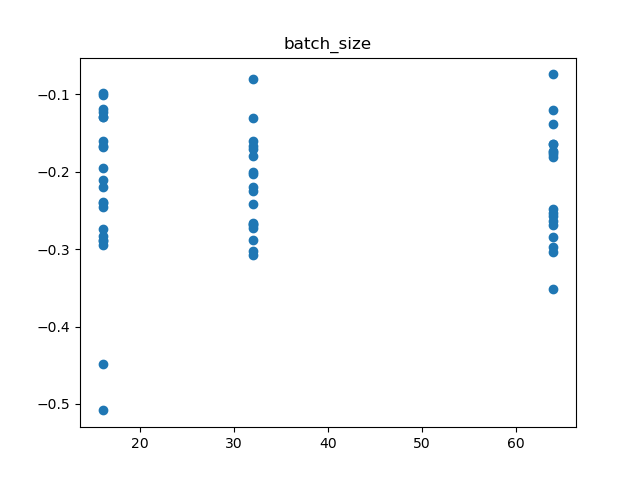

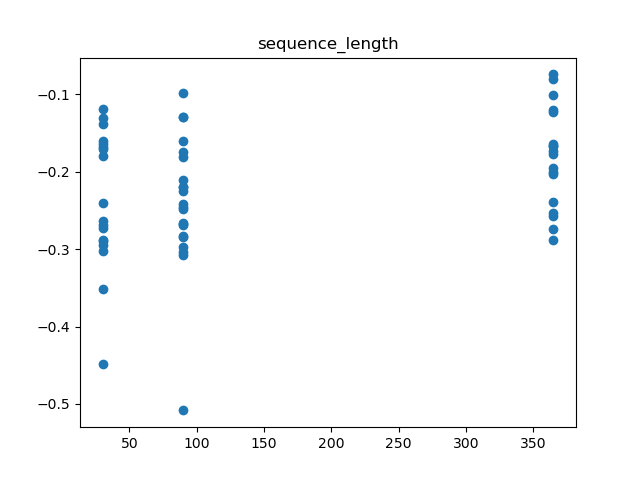

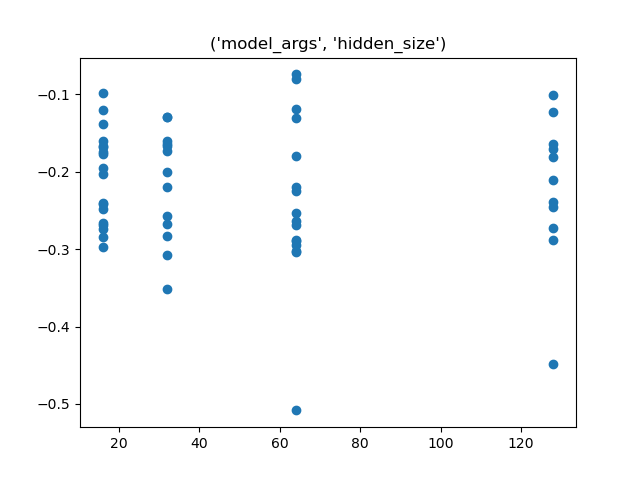

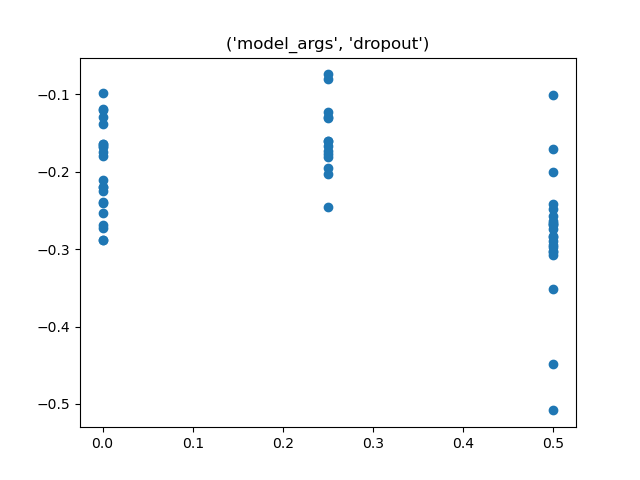

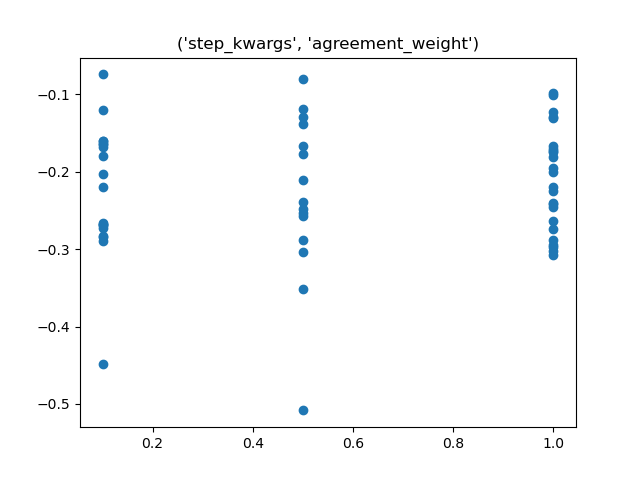

In [19]:
plt.close('all')

for idx, name in enumerate(params):
    param_value = [t[idx] for t in updates]
    # y = [v.loc['R2','usgs_q'] for v in bulk.values()]
    y = [v['flux']['R2'].median() for v in basin.values()]
    
    plt.figure()
    plt.scatter(param_value, y)
    plt.title(name)

Text(0, 0.5, 'Flux')

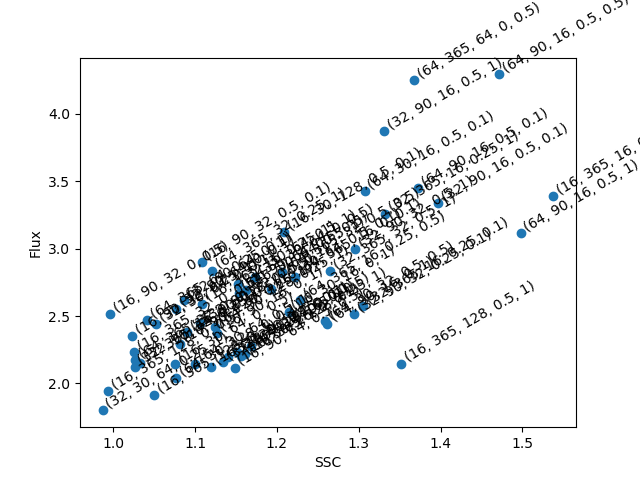

In [21]:
plt.close('all')

# x = [v.loc['R2','ssc'] for v in bulk.values()]
# y = [v.loc['R2','flux'] for v in bulk.values()]
x = [v['ssc']['RE'].median() for v in basin.values()]
y = [v['flux']['RE'].median() for v in basin.values()]


plt.scatter(x, y)

# Add labels to each point
for i, update_tuple in enumerate(updates):
    plt.annotate(str(update_tuple), (x[i], y[i]), xytext=(1, 1), textcoords='offset points', rotation=30)

plt.xlabel('SSC')
plt.ylabel('Flux')

In [23]:
3E-4

0.0003

(array([ 2.,  0.,  1.,  1.,  4.,  1.,  2.,  6., 20., 21.]),
 array([-0.79847664, -0.69532445, -0.59217227, -0.48902008, -0.3858679 ,
        -0.28271572, -0.17956353, -0.07641135,  0.02674084,  0.12989302,
         0.23304521]),
 <BarContainer object of 10 artists>)

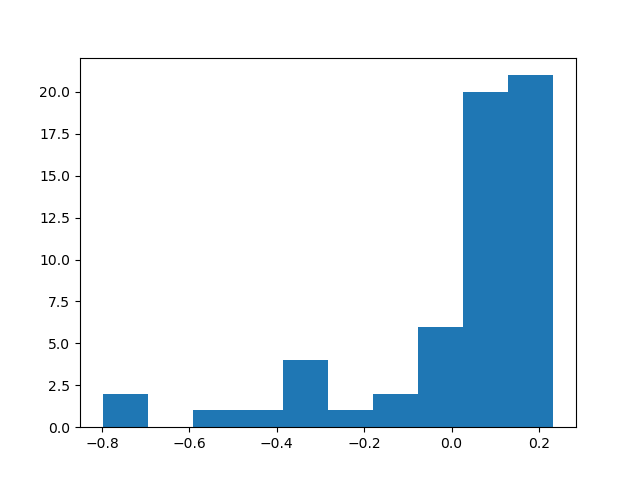

In [3]:


plt.close('all')
plt.hist(y)

In [20]:
df1

,ssc,flux,usgs_q
num_obs,6185.000000,1778.000000,177143.000000
R2,0.119415,0.273996,0.314133
MAPE,1.256309,5.194462,317029.625000
nBias,0.485912,0.485347,0.448334
RE,1.089704,1.607366,0.965324
MAE,1128.416992,32870.468750,261.313751
RMSE,5574.385742,139232.250000,1089.886719
rRMSE,839.126587,585.208464,506.840467
KGE,0.023031,0.105175,0.167928
NSE,-3.640820,-4.041073,-2.862840
